# 활성화 함수의 이해

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from itertools import product
import tensorflow as tf

tf.random.set_seed(7879)

print('Ready to activate?⤴')

Ready to activate?⤴


### 활성화 함수

오늘은 수학 분야에서도 딥러닝과 아주아주 밀접하고 직접적인 주체를 다루어 보겠다. 바로 softmax나 ReLu 등 이미 익숙히 들어봤을 활성화 함수(activation function)이다. 활성화 함수란 무엇일까?

'어떤 조건을 만족' or '어떤 조건을 불만족'

우리가 지금까지 써왔던 신경망 속의 퍼셉트론(percceptron) 혹은 노드(node)도 '특정 조건'이 만족하면 '활성화' 되도록 디자인 되어 있다. 노드에 입력으로 들어오는 값이 어떤 '임계치'를 넘어가면 "활성화(activated)"가 되고, 넘어가지 않으면" 비활성화(deactivated)"되게끔 코딩이 되어있다는 것이다. 익숙하게 써왔던 ReLU 함수는 이러한 관점에서 어떻게 작용하고 있을까?

ReLU는 입력값이 음수라면, 즉 0 미만이라는 조건을 만족한다면 0을 출력하고, 입력값이 0이상이면 입력값 그대로를 출력하도록 디자인 되어 있다. 이를 "활성화 or 비활성화"로 표현하려면 우선 활성화 되는 기준을 정해야 한다. 만일 출력값이 0보다 큰 경우를 활성화되었다고 정의한다면, ReLU함수란, "0미만인 경우는 비활성화가 되고 0 이상인 경우는 활성화되는 함수"라고 말할 수 있다.

#### 시그모이드

시그모이드는 ReLU처럼 명확하고 간단하게 글로 표현하긴 힘들지만, 입력값이 -무한대로 갈수록 0을 출력하고 +무한대로 갈수록 1을 출력하며, 0일 때는 1/2을 출력하는 함수다. 수식적으로는 x를 입력값이라고 할 때, f(x) = 1/1+exp(-x)로 표현할 수 있다.

이 함수는 입력값에 '무관하게' 0 ~ 1 사이의 값으로 출력하는 특징이 있으며, 따라서 "참"/"거짓" 혹은 "앞면"/"뒷면" 처럼 2가지 상황을 구분할 때 용이하다(참=0, 거짓=1로 대응 시켜 구분할 수 있으므로)

또한 활성화와 비활성화의 조건을 0.5로 잡았으니, 시그모이드는 0이상일 때 활성화가 되고, 0보다 작을 때 비활성화 된다고 말할 수 있다.

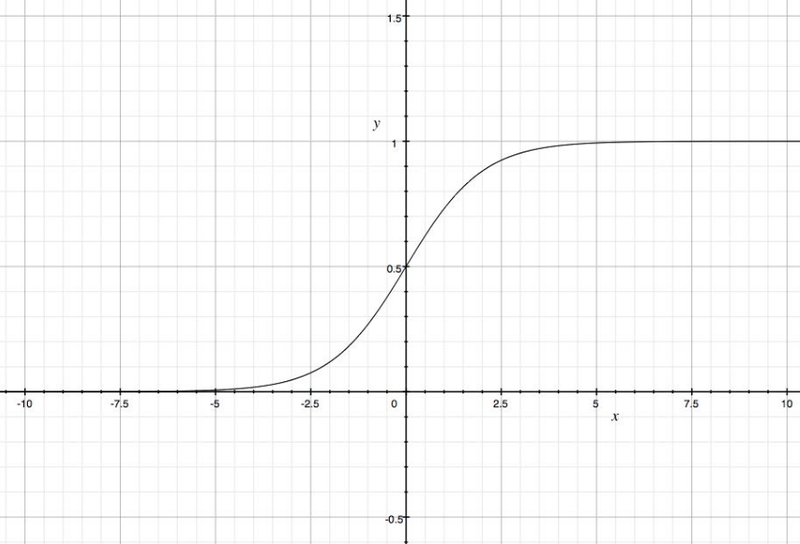

활겅화 함수의 기본적 정의는 위와 같지만, 실제로 딥러닝에서 활성화 함수를 쓰는 결정적 이유는 따로 있다. 바로 딥러닝 모델의 표현력을 향상시켜주기 위해서이다. 전문적인 용어로는 모델의 representation capacity 또느 expressivity를 향상시킨다고 말한다.

활성화 함수는 모델의 표현력을 왜 향상시켜줄까? 만일 어떤 모델이 w1, b1이라는 2개의 parameter로 이루어진 모델이라고 생각해보자.

f(x) = xw1 + b1

그런데 이 모델로 x**2, x**5, sin(x) 등으로 표현되는 데이터를 학습할 수 있을까? 답은 "그럴 수 없다"이다. 왜냐하면, w1, b1 값을 아무리 바꿔도 x**2, x**5, sin(x)와 같은 함수는 절대 표현할 수 없기 때문이다. 이를 수학적으로 말하면, "선형"함수(직선)로는 "비선형"함수(사인곡선 or x**5와 같은 고차항)를 표현할 수 없다'라고 말한다.

그런데 잘 생각해 보면, 딥러닝 모델의 parameter(w,b)들은 입력값 x와 선형 관계이다. 왜냐하면, xw + b의 형태로 표현되어서, 즉 곱하고 더하는 연산만 하면서 그다음 layer로 전달하기 때문이다. 그리고 아무리 많은 layer들을 겹쳐도 역시 그 결과는 선형관계이다. 따라서 사인 곡선처럼 직선으로는 근사 시킬 수 없는 (혹은 고양이나 강아지 사진처럼 무수히 많고 복잡한 특징들을 가진) 비선형 데이터를 표혀하려면 딥러닝 모델도 비선형성을 지니고 있어야 한다.  이 때 쓰인것이 바로 활성화 함수다. 이 활성화 함수를 layer 사이사이에 넣어줌으로써 모델이 비선형 데이터도 표현할 수 있게 되었다. 

마지막으로 활성화 함수에는 하이퍼볼릭 탄젠트(tanh), 시그모이드(sigmoid), Softmax, ReLU 등등 많은 함수들이 있다. 활성화 함수들이 가지느 특징들도 알아보자.

### 퍼셉트론

활성화 함수라는 아이디어는 어디서부터 비롯되었나?

활성화 함수가 어디서 나온 건지 알아보기 위해서는 먼저 퍼셉트론을 알아봐야 한다.

우리가 알고 있는 딥러닝 모델은 보통 여러 개의  층으로 이루어져 있따. 그중에 하나의 층을 가져와 다시 쪼갠다면 보통 '노드'라고 불리는 것으로 쪼개지게 되는데, 이것이 바로 퍼셉트론(Pereceptron)이다. 반대로  퍼셉트론을 쌓으면 단층 퍼셉트론이 되고, 이 단층 퍼셉트론을 쌓으면 다층 퍼셉트론이 된다. 즉, 우리가 알고 있는 딥러닝 모델은 사실 퍼셉트론들이 다양한 구조로 쌓인 것이다.

그렇다면 퍼셉트론은 어떻게 나온 것일까?

우리의 목표는 컴퓨터를 학습시키는 것이다. 그런데 어떻게 컴퓨터를 학습시킬 수 있을까? 과학자들은 방법을 생각하다가 이미 잘 짜인 머신이라고도 할 수 있는 동물의 학습 방법을 모방하기로 했다. 이를 위해서 학습시킬 머신 자체를 동물의 신경세포와 유사하게 설계해 나오게 된 것이 바로 최초의 퍼셉트론이다.

#### 신경세포의 구조

그럼 퍼셉트론의 구조를 보기 전에 간단히 신경세포(Neuron)에 대해 잠시 살펴보겠다.

신경세포는 크게 세포체(Soma), 가지돌기(Dendrite), 축삭돌기(Axon), 시냅스(Synapse)로 구성되어 있다.

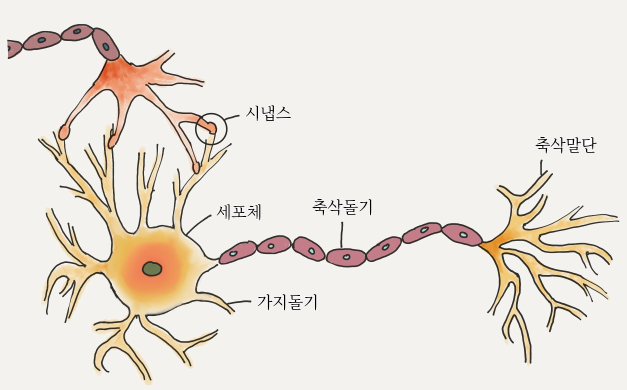

가지돌기

세포로 전달되는 신호를 받아들이는 부분이다.

축삭돌
세포에서 다른 세포로 신호를 전달하는 부분이다.

시냅스

가지돌기와 축삭돌기 사이에 있는 부분으로 신호 전달의 세기를 담당하며 시냅스의 발달 정도에 따라 같은 신호도 강하게 전달되거나 약하게 전달된다.
시냅스는 사용 빈도에 따라 커지거나 작아지며 심지어 시냅스 자체가 사라지기도 한다.

세포체

세포체는 각 가지돌기로부터 들어온 신호들로부터 자신의 출력 신호를 만들고 이를 다음 세포에 전송한다. 이때의 출력 신호는 단순히 입력신호들의 합이 아닌 비선형 방식으로 결정된다. 즉, 합이 일정 수준 이하이면 비활성 상태가 되어 신호를 무시하고, 일정 수준을 넘게 되면 활성 상태가 되어 신호를 다음 세포로 전송한다.



#### 퍼셉트론의 구조

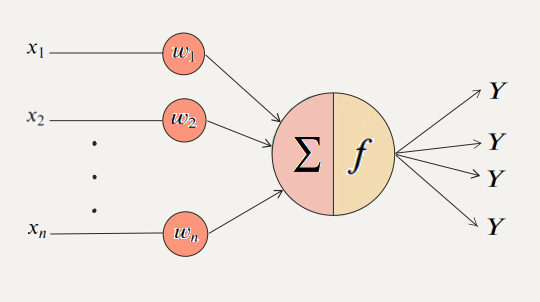

앞에서 소개한 신경세포의 구조와 퍼셉트론의 구조를 대응 시켜 소개하겠다.

퍼셉트론에 주어지는 입력은 신경세포에서 가지돌기로 받아들이는 신호에 해당한다. 각 입력 항에 곱해지는 가중치는 신경 세포들의 연결 부위에 형성된 스냅스의 발달 정도에 해당한다. xiwi값들은 각 가지돌기에서 시냅스를 거쳐서 오는 신호들에 해당되며 세포체에서 이 신호들은 합쳐진다. 실제 신경세포에는 없지만 퍼셉트론에선 추가로 편향이라고 불리는 b라는 신호 또한 합산에 포함된다. 그리고 이 합쳐진 신호는 세포체에서 신호를 처리하는 방식과 비슷하게 적절한 활성화 함수(activation function) f를 거쳐 출력이 결정된다. 이것을 식으로 정리하면 다음과 같다.

X= 
i=1
∑
n
​
 x 
i
​
 w 
i
​
 +b

 Y = f(X)

여기서 X는 합쳐진 신호이며, Y는 퍼섭트론의 최종 출력이다.

당연한 말이지만, 이런 간단한 모델이 복잡한 신경 세포와 동일하게 작동된다고 말할 수 없다. 하지만, 이 퍼섭트론을 다양한 구조로 연결하고, 가중치와 편향값을 적절히 조정해 주는 것으로 유사하게 작동하게 만들어 줄 수 있다. 이렇게 조정해 주는 과정이 학습이며 학습을 통해 기계는 동물과 비슷한 일들(과일 분류, 결함 탐지, 음성 인식 등)을 처리할 수 있게 된다.

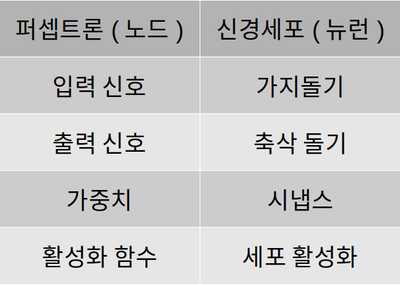

#### 활성화 함수

앞서 확인할 수 있듯이 호라성화 함수는 신경 세포로 치면 세포체에서 일어나는 일을 맡고 있다. 따라서 하는 일도 비슷하다. 들어온 신호가 특정 임계점을 넘으면 출력을 하고, 넘지 못하면 무시를 한다. 활성화 함수는 신호를 '전달'해주기 때문에 Transfer function으로도 알려져 있다.

활성화 함수는 그 표현에 따라

선형 활성화 함수(LInear activation function)

비선형 활성화 함수(Non-linear activation function)

로 나눌 수 있다.

딥러닝에서는 일반적으로 비선형 활성화 함수를 사용한다고 한다. 그럼 선형 활성화 함수는 왜 딥러닝에서 사용되지 않는 것일까? 이를 알아보고 위해 먼저 선형(Linear)에 대해 알아보자. 



### 선형과 비선형

#### 선형

선형 변환이란 '선형'이라는 규칙을 지키며 V 공간상의 벡터를 W 공간상의 벡터로 바꿔주는 역활을 한다.

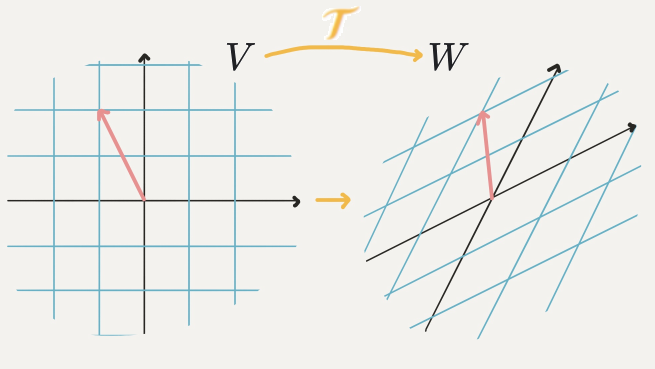

#### 선형변환 정의

V 와 W가 어떤  
 벡터 공간이고 둘 모두 
(2)
 실수 집합
(3)
 상에 있다고 가정하겠습니다. 이때 함수  
(4)
  T : V →W 가 다음 두 조건을 만족할 때,

가산성(Additivity) : 모든 x, y $\in$ Vx,y∈V 에 대해, T(x+y) = T(x)+ T(y) 

동차성(Homogeneity) : 모든 x $\in$ V, c \in \Bbb{R}x∈V,c∈R 에 대해, T(cx)=cT(x)

우리는 함수 T를 선형 변환(linear transformation)이라고 부릅니다.
 
(1)
  : 간단하게 말해서 벡터를 그릴 수 있는 공간입니다. 영상에서의 좌표 평면이라고 생각하시면 됩니다.

(2)
  : 정확히 표현하면 같은 체(field)에 속해 있다고 해야 하나, 이 글에선 실수만 다루기 때문에 실수 집합 상에 있다고 표현했습니다. 체의 예로는 실수 집합 R, 유리수 집합 Q, 복소수 집합 C 등이 있습니다.

(3)
  : 실수 집합 상에 있다는 말은 V를 이루는 원소들이 실수라는 의미입니다. 예를 들어 실수 집합 상의 V가 어떤 벡터들의 집합이라고 했을 때, 그 벡터는 실수 벡터(벡터의 각 원소가 실수)가 됩니다.
 
(4)
  : 정의역(domain)이 V이고 공역(codomain)이 W인 함수 T라는 의미입니다.

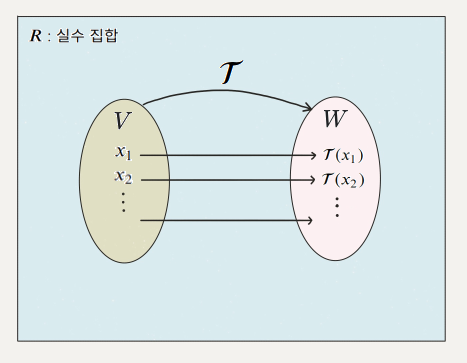

간단히 'T는 선형(linear)이다.'라고 하기도 한다.

T가 선형이라면 다음과 같은 성질을 가진다.

### 비선형 함수를 쓰는 이유(1)

#### 비선형(Non-linear)

그렇다면 비선형은 뭘까요?

간단합니다. 선형이 아닌 함수를 비선형(Non-linear)함수라고 합니다. 

아래 함수f(x)들을 살펴보고, 다음 질문에 답해 봅시다.

1. f(x) = 3x
2. f(x) = x**2
3. 
f(x)=θ 
0
​
 x 
0
​
 +θ 
1
​
 x 
1
​
 , (
x
=
[
x
0
  
x
1 
]
x=[x 
0x 1
 ]은 벡터)

#### 비선형 함수를 쓰는 이유

그렇다면 왜 딥러닝에서는 비선형 활성화 함수를 주로 사용할까?

앞서 Introduction에서 잠시 언급했듯, 한 문장으로 요약하자면, "딥러닝 모델의 표현력을 향상시키기 위해서"입니다.

1. 그럼 선형 활성화 함수를 사용하면 왜 표현력이 떨어지게 되는 걸까?
2. 레이어를 충분히 쌓는다면 선형 활성화 함수를 사용한 모델의 표현력을 향상시킬 수 있지 않을까?

간단한 예시를 통해 알아가보도록 하자. 

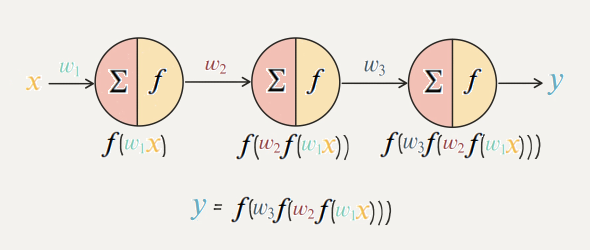

위 그림과 같이 퍼셉트론 3개로 구성된 모델이 있다고 가정하자.

입력값 x가 모델을 거치면 출력값 y가 된다. (여기서 입력값 x와 출력값 y는 스칼라값이고 f는 활성화 함수다.)

수식으로 표현하면 다음과 같다.

y = f(w3f(w2f(w1x)))

여기서 wi는 각 입력에 곱해지는 가중치이며, 편향값은 편의를 위해 0으로 두겠다.

이때 만약 f가 선형이라고 한다면 무슨 일이 일어날까?

f가 선형이기 때문에 선형 함수의 정의에 의해 f(w1x) = w1f(x)로 쓸 수 있기 때문에 이를 적용시키면, w1,w2,w3을 아래의 식과 같이 합칠 수 있다.


y = f(w3f(w2f(w1x))) = f(w3f(f(w1w2x)))

                     = f(f(f(w1w2w3x)))

                     = f(f(f(Wx)))

여기서 W = w1w2w3이다.

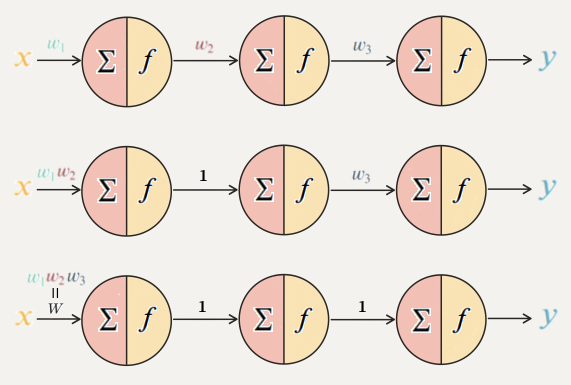

(위 그림과 같이 wi가 서로 자리를 바꿀 수 있는 것은 wi가 스칼라이기 때문이다. 편의를 위해 순서대로 나열했다. (즉, w1w2 = w2w1))

이것의 의미는 가중치의 업데이트가 w1, w2, w3 셋 전부에서 일어날 필요가 없다는 것이다.

간단하게 예를 들어 보겠다.

w1, w2, w3의 가중치를 모두 1로 초기화하고 모델을 훈련시켰을 때, 최종적으로 훈련된 모델의 가중치들이 w1', w2', w3'라고 하겠다.

y = f(w3'f(w2'f(w1'x)))

함수 f가 선형인 것을 이용해 식을 다음과 같이 바꿔 보겠다.

y= f(f(f(Wx)))

여기서 W = w1'w2'w3'이다. 이 식은, 사실상 w1,w2,w3의 가중치를 모두 1로 초기화하고 모델을 훈련시켰을 때, w2와 w3은 업데이트되지 않게 고정시키고 w1만 업데이트한 것과 같다.

즉, w2와 w3의 가중치가 어떻게 변하는지와 상관없이 w1만 잘 업데이트되면 결과는 같다는 것이다.

그럼 나아가서 f(f(f(Wx)))를 f*(Wx)로 표현할 수도 있을까?

이렇게 하기 위해선 그냥 f함수 3개를 하나의 합성함수로 만들어 주면 된다. 그런데 선형 함수들의 합성함수도 선형일까?

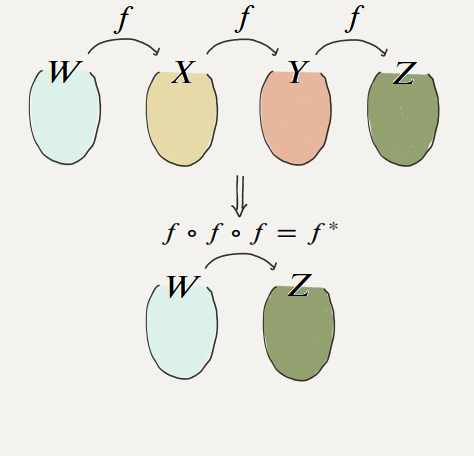

그렇다 선형이다. 그럼 어떻게 해서 선형이 되는지 증명해 보고 넘어가도록 할까?

UT(ax+y)
​
  
=U(T(ax+y))
=U(aT(x)+T(y))
=aU(T(x))+U(T(y))
=aUT(x)+UT(y)
​
 


이므로, 선형의 성질에 의해 UT도 선형이다.

우리는 이제 선형함수의 합성함수 또한 선형이라는 것을 알았다. 이 정리에 의해 우리는 이제 f(f(f(Wx)))를 f*(Wx)로 표현할 수 있다.

이것의 의미는 무엇일까?

바로 3개의 노드를 1개로 줄여서 표현을 해도 결과가 달라지지 않는다는 것이다.

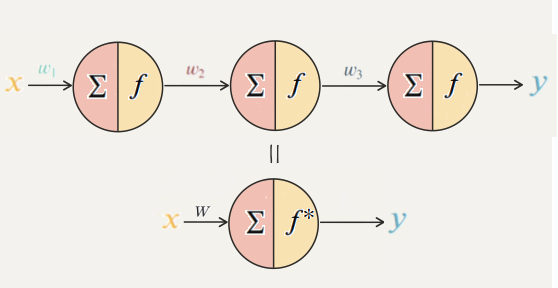

### 비선형 함수를 쓰는 이유 (2)

결론적으로, 선형 활성화 함수를 사용한다면, 노드의 개수를 아무리 많이 붙여도 결국 하나의 노드를 사용하는 것과 차이가 없다. 그럼 위에서 노드 3개를 사용한 모델은 결국 다음과 같이 단순한 식으로 표현이 된다.

y = model(x) = f(wx) = awx

여기서, 활성화 함수 f는 일반적인 선형 함수 f(x) = ax라고 하겠다. (a는 어떤 실수이다)

위 식으로부터 알 수 있듯이, 이러한 모델은 선형적 특성을 띠는 데이터만 예측할 수 있고, 비선형적 특성을 띠는 데이터는 예측할 수 없다.이러한 모델로 비선형 특성을 띠는 데이터를 예측하라는 것은 ax에서 a값을 바꾸어 x**2을 만들라는 것과 다름이 없다.

다시 말해, 선형 활성화 함수를 사용한다면, 모델의 표현력이 떨어지게 된다. 자 그럼 단일 노드가 아닌 layer들로 구성되어 있는 모델에서도 위와 같을까?

지금부터는 Layer들을 쌓아도 활성화 함수가 선형이라면 모델의 표현력은 증가하지 않는다는 것을 증명해 보겠다. 아래 그림은 inut, layer가 각각 1개, hidden layer는 2개(왼쪽 그림) or 1개(오른쪽)로 구성된 임의의 모델이다. 빨간색으로 표현된 부분은 활성화 함수이며, 두 모델 모두 선형 활성화 함수라고 본다.

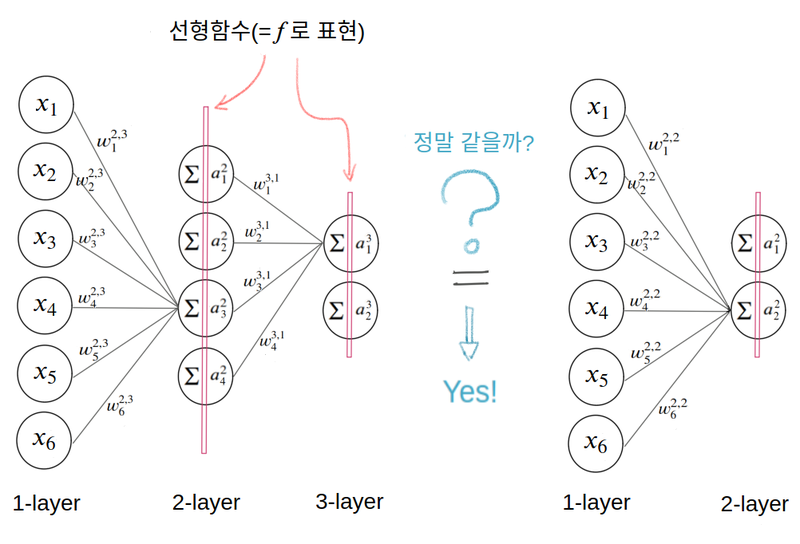

먼저, 각 노드와 연관된 weight와 노드에서 연산된 값(=activation value)을 다음과 같이 표현하겠다.

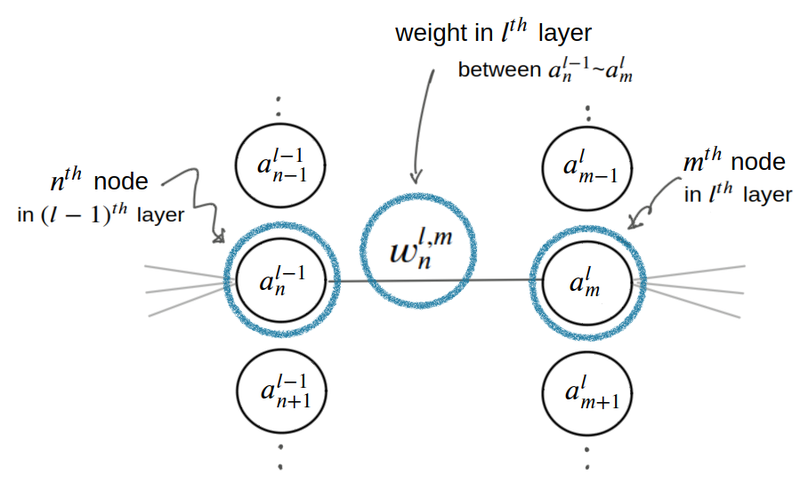

위와 같이 하나의 weight에는 양옆에 있는 layer와 연결이 되어있으므로, 3개의 index가 필요하다.


​


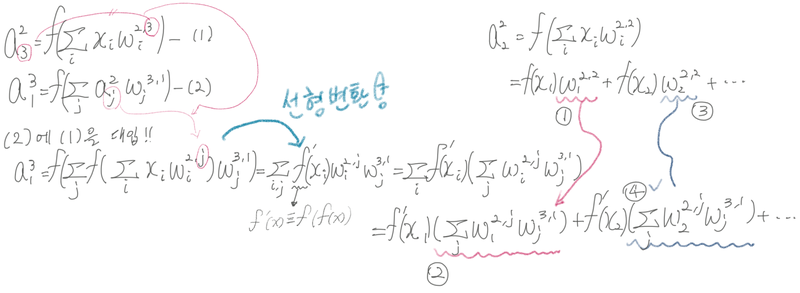

위에 설명한 것을 간단하게 표현하면 위와 같다. 왼쪽 모델이 표현하는 모든 함수는 오른쪽 모델이 항상 포현할 수 있다.

#### 그렇다면..

반면에 다음과 같이 각layer마다 비선형 함수가 있다면 어떻게 될까?

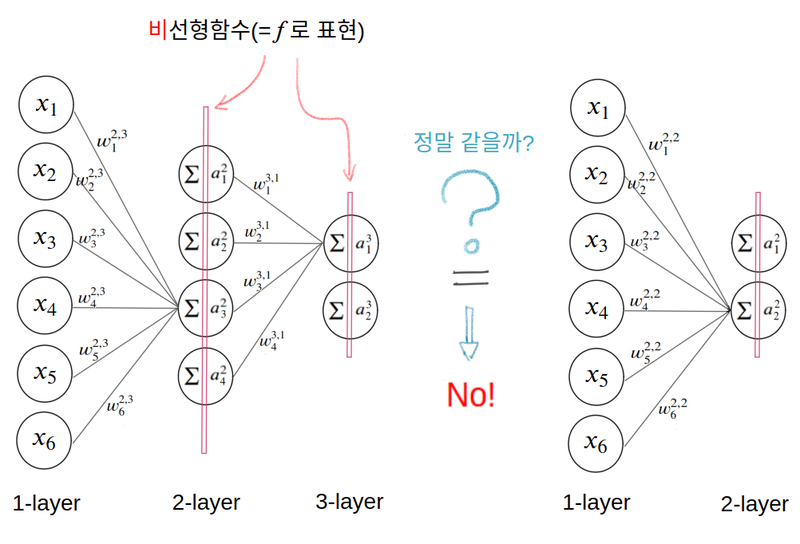

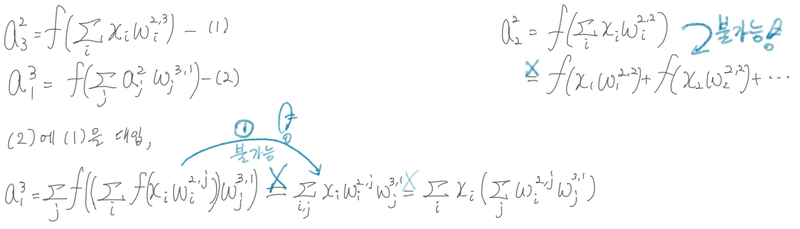

### 활성화 함수의 종류 (1) 이진 계단 함수

활성화 함수는 크게 3가지 종류의 함수로 나눌 수 있다.

1. 이진 계단 함수(Binary step function)

2. 선형 활성화 함수(Linear activation function)

3. 비선형 활성화 함수(Non - linear activation function)



#### 이진 계단 함수

이진 계단 함수(Binary step function)라는 이름을 붙은 이유는 간단하다. 이 함수로 들어온 입력이 특정 임계점을 넘으면 1(혹은 True)를 출력하고 그렇지 않을 때는 0을 출력하기 때문이다. (그래프를 보면 더 명확히 알 수 있다) 이러한 특성 때문에 이 활성화 함수는 간단한 이진 분류 문제에서 꽤 유용하게 쓰인다.

f
(
x
)
=
{
0
for 
x
<
0

1
for 
x
≥
0


In [33]:
def binary_step(x, threshold=0): 
# threshold가 있는 함수를 쓰면 꼭 default 값을 설정해주세요
    return 0 if x<threshold else 1

In [34]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def plot_and_visulize(image_url, function, derivative=False):
    X = [-10 + x/100 for x in range(2000)]
    y = [function(y) for y in X]
    
    plt.figure(figsize=(12,12))
    
    # 함수 그래프
    plt.subplot(3,2,1)
    plt.title('function')
    plt.plot(X,y)
    
    # 함수의 미분 그래프
    plt.subplot(3,2,2)
    plt.title('derivative')
    if derivative:
        dev_y = [derivative(y) for y in X]
        plt.plot(X,dev_y)
    
    # 무작위 샘플들 분포
    samples = np.random.rand(1000)
    samples -= np.mean(samples)
    plt.subplot(3,2,3)
    plt.title('samples')
    plt.hist(samples,100)
    
    # 활성화 함수를 통과한 샘플들 분포
    act_values = [function(y) for y in samples]
    plt.subplot(3,2,4)
    plt.title('activation values')
    plt.hist(act_values,100)
    
    # 원본 이미지
    image = np.array(Image.open(image_url), dtype=np.float64)[:,:,0]/255. # 구분을 위해 gray-scale해서 확인
    image -= np.median(image)
    plt.subplot(3,2,5)
    plt.title('origin image')
    plt.imshow(image, cmap='gray')
    
    # 활성화 함수를 통과한 이미지
    activation_image = np.zeros(image.shape)
    h, w = image.shape
    for i in range(w):
        for j in range(h):
            activation_image[j][i] += function(image[j][i])
    plt.subplot(3,2,6)
    plt.title('activation results')
    plt.imshow(activation_image, cmap='gray')
    
    return plt

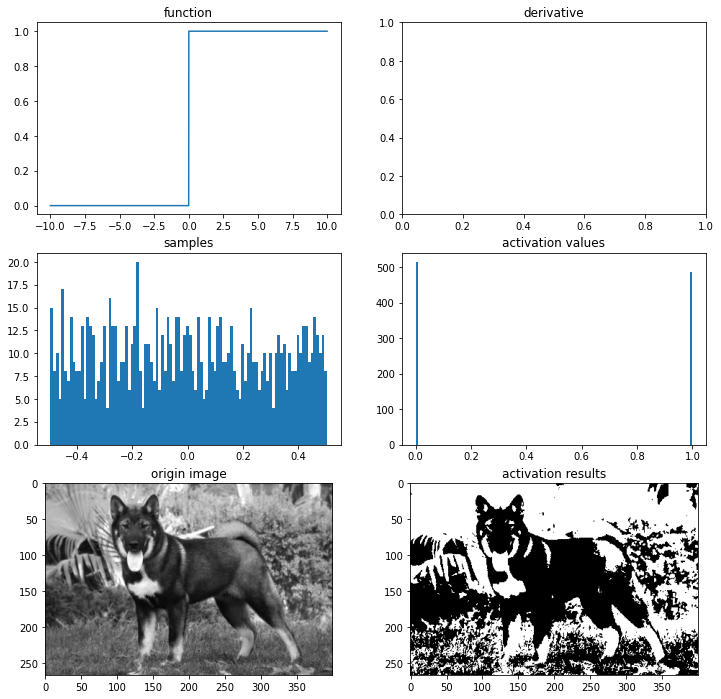

In [35]:
img_path = '/content/drive/MyDrive/jindo_dog.jpg'
ax = plot_and_visulize(img_path, binary_step)
ax.show()

이진 계단 함수의 치역(range)은 0,1 (0과 1만 나온다는 뜻)이 된다.

이진 계단 함수는 단층 퍼셉트론(single layer perceptrons)라는 초기의 신경망에서 자주 사용된다.

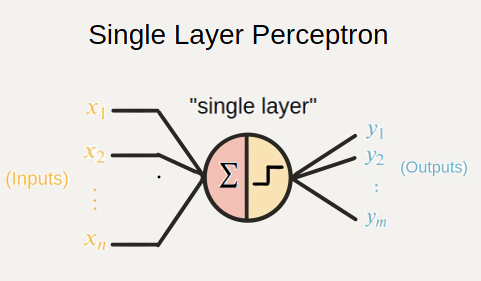

In [36]:
# 퍼셉트론
class Perceptron(object):
    def __init__(self, input_size, activation_ftn, threshold=0, learning_rate=0.01):
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn(1)
        self.activation_ftn = np.vectorize(activation_ftn)
        self.learning_rate = learning_rate
        self.threshold = threshold

    def train(self, training_inputs, labels, epochs=100, verbose=1):
        '''
        verbose : 1-매 에포크 결과 출력, 
                  0-마지막 결과만 출력 
        '''
        for epoch in range(epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.__call__(inputs)
                self.weights += self.learning_rate * (label - prediction) * inputs
                self.bias += self.learning_rate * (label - prediction)
            if verbose == 1:
                pred = self.__call__(training_inputs)
                accuracy = np.sum(pred==labels)/len(pred)
                print(f'{epoch}th epoch, accuracy : {accuracy}')
        if verbose == 0:
            pred = self.__call__(training_inputs)
            accuracy = np.sum(pred==labels)/len(pred)
            print(f'{epoch}th epoch, accuracy : {accuracy}')
    
    def get_weights(self):
        return self.weights, self.bias
                
    def __call__(self, inputs):
        summation = np.dot(inputs, self.weights) + self.bias
        return self.activation_ftn(summation, self.threshold)

이러한 신경망은 선형적으로 구분 가능한(linearly separable) 문제(예를 들면, AND gate 또는 OR gate0를 구현할 수 있다. 다시 말해 하나의 선으로 구분할 수 있는 문제를 풀 수 있다.

In [37]:
def scatter_plot(plt, X, y, threshold = 0, three_d=False):
    ax = plt
    if not three_d:
        area1 = np.ma.masked_where(y <= threshold, y)
        area2 = np.ma.masked_where(y > threshold, y+1)
        ax.scatter(X[:,0], X[:,1], s = area1*10, label='True')
        ax.scatter(X[:,0], X[:,1], s = area2*10, label='False')
        ax.legend()
    else:
        area1 = np.ma.masked_where(y <= threshold, y)
        area2 = np.ma.masked_where(y > threshold, y+1)
        ax.scatter(X[:,0], X[:,1], y-threshold, s = area1, label='True')
        ax.scatter(X[:,0], X[:,1], y-threshold, s = area2, label='False')
        ax.scatter(X[:,0], X[:,1], 0, s = 0.05, label='zero', c='gray')
        ax.legend()
    return ax

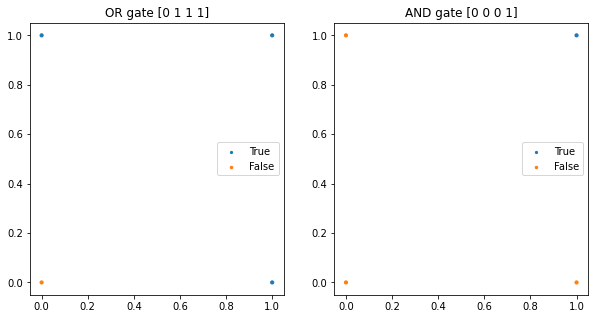

In [38]:
# AND gate, OR gate
X = np.array([[0,0], [1,0], [0,1], [1,1]])

plt.figure(figsize=(10,5))
# OR gate
or_y = np.array([x1 | x2 for x1,x2 in X])
ax1 = plt.subplot(1,2,1)
ax1.set_title('OR gate ' + str(or_y))
ax1 = scatter_plot(ax1, X, or_y)

# AND gate
and_y = np.array([x1 & x2 for x1,x2 in X])
ax2 = plt.subplot(1,2,2)
ax2.set_title('AND gate ' + str(and_y))
ax2 = scatter_plot(ax2, X, and_y)

plt.show()

이진 계단 함수의 임계점이 0이라고 하면 위의 gate들의 다음과 같이 단층 퍼셉트론으로 구현할 수 있다.

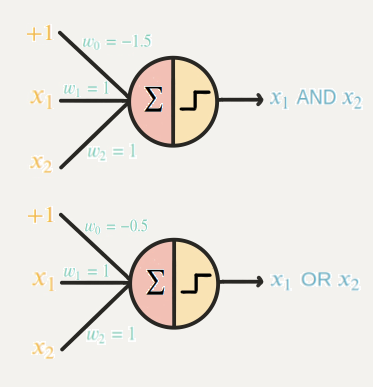

In [39]:
# OR gate
or_p = Perceptron(input_size=2, activation_ftn=binary_step)
or_p.train(X, or_y, epochs=1000, verbose=0)
print(or_p.get_weights()) # 가중치와 편향값은 훈련마다 달라질 수 있습니다.

# AND gate
and_p = Perceptron(input_size=2, activation_ftn=binary_step)
and_p.train(X, and_y, epochs=1000, verbose=0)
print(and_p.get_weights()) # 가중치와 편향값은 훈련마다 달라질 수 있습니다.

999th epoch, accuracy : 1.0
(array([0.4445847 , 0.00782259]), array([-0.00502111]))
999th epoch, accuracy : 1.0
(array([0.02348267, 0.54363512]), array([-0.56009996]))


OR gate와 AND gate를 구현한 단층 퍼셉트론 모델의 accuracy가 1.0을 기록하고 있다. 이 정도면 단층 퍼셉트론으로 OR gate와 AND gate를 충분히 구현해 낼 수 있음을 확인할 수 있다.

그럼 우리의 단층 퍼셉트론 모델의 추론 결과를 그래프로 그려보자. 위에서 그려보았던 그래프가 4게의 점으로 표시된 것에 비해, 아래 그려질 그래프는 x, y축을 100분등한 결과를 모델에 대입하여 True와 False의 경계선이 선형적으로 드러나도록 그려질 것이다. 위에서 언급한 것처럼 퍼셉트론이 하나의 선으로 구분할 수 있는 문제를 풀 수 있다는 것을 시각적으로 확인하기 위해서다. 

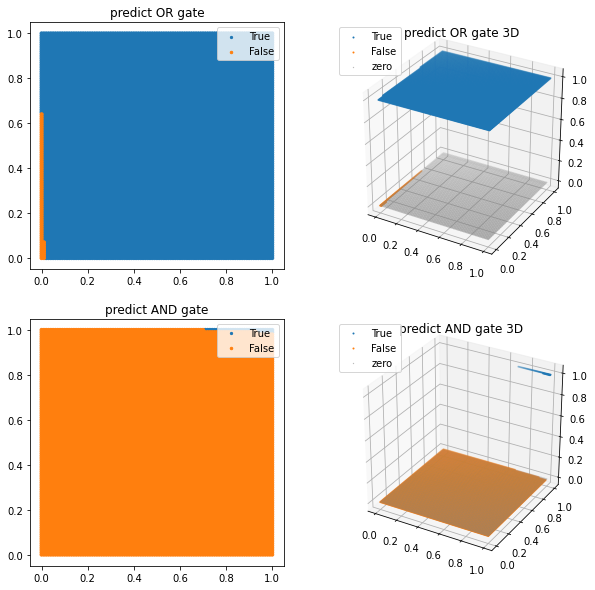

In [40]:
from itertools import product

# 그래프로 그려보기
test_X = np.array([[x/100,y/100] for (x,y) in product(range(101),range(101))])
pred_or_y = or_p(test_X)
pred_and_y = and_p(test_X)

plt.figure(figsize=(10,10))
ax1 = plt.subplot(2,2,1)
ax1.set_title('predict OR gate')
ax1 = scatter_plot(ax1, test_X, pred_or_y)

ax2 = plt.subplot(2,2,2, projection='3d')
ax2.set_title('predict OR gate 3D')
ax2 = scatter_plot(ax2, test_X, pred_or_y, three_d=True)

ax3 = plt.subplot(2,2,3)
ax3.set_title('predict AND gate')
ax3 = scatter_plot(ax3, test_X, pred_and_y)

ax4 = plt.subplot(2,2,4, projection='3d')
ax4.set_title('predict AND gate 3D')
ax4 = scatter_plot(ax4, test_X, pred_and_y, three_d=True)

plt.show()

어떤가 ? 당초 예상했던 것과 그래프 모양이 다소 다르게 나온다. 이 그래프의 모양은 단층 퍼셉트론을 훈련할 때마다 다르게 그려진다. OR gate와 AND gate의 accuracy를 1.0으로 만드는 퍼셉트론의 최적 가중치 값은 하나로 정해져 있찌 않으므로, 따라서 이 가중치에 의해 결정되는 그래프의 모양도 계속 달라진다. 그러나 중요한 것은 퍼셉트론의 가중치가 결정짓는 경계선을 기준으로 [[0,0], [1,0], [0,1], [1,1]] 이상 4개의 점에서의 OR gate, AND gate의 진릿값이 정확한가 하는 것이다.

#### 이진 계단 함수의 한계1

하지만, XOR gate도 구현할 수 있을까?

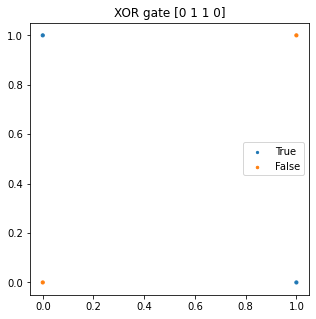

In [41]:
# XOR gate
threshold = 0
X = np.array([[0,0], [1,0], [0,1], [1,1]])

plt.figure(figsize=(5,5))
xor_y = np.array([x1 ^ x2 for x1,x2 in X])
plt.title('XOR gate '+ str(xor_y))
plt = scatter_plot(plt, X, xor_y)
plt.show()

999th epoch, accuracy : 0.25
(array([-0.02049796, -0.0179853 ]), array([0.01614195]))


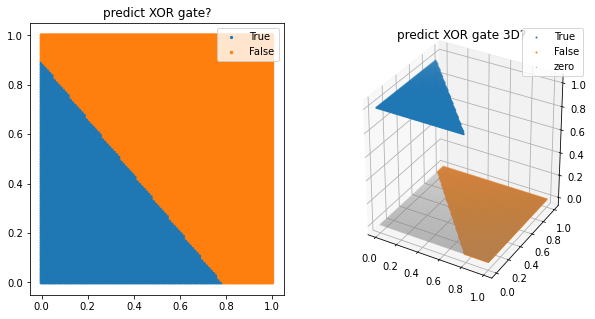

In [42]:
# XOR gate가 풀릴까?
xor_p = Perceptron(input_size=2, activation_ftn=binary_step, threshold=threshold)
xor_p.train(X, xor_y, epochs=1000, verbose=0)
print(xor_p.get_weights())

# 그래프로 그려보기
test_X = np.array([[x/100,y/100] for (x,y) in product(range(101),range(101))])
pred_xor_y = xor_p(test_X)

plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,2,1)
ax1.set_title('predict XOR gate?')
ax1 = scatter_plot(ax1, test_X, pred_xor_y)

ax2 = plt.subplot(1,2,2, projection='3d')
ax2.set_title('predict XOR gate 3D?')
ax2 = scatter_plot(ax2, test_X, pred_xor_y, three_d=True)

plt.show()

어떤가? 이번에 나온 accuracy는 무려 0.5밖에 안된다 왜 그럴까?

단층 퍼셉트론은 이 XOR gate를 구현할 수 없다. 왜냐하면 XOR gate의 진릿값 그래프를 하나의 선으로 구분을 할 수 없기 때문이다. 하지만 이를 해결할 수 있는 방법이 있다. 바로 여러 층을 쌓는 것이다. 이렇게 여러 층을 쌓은 모델을 다층 퍼셉트론(multi-layer perceptron. MLP)이라고 한다.

(여기서 말하는 single layer, multi-layer라고 하는 것은 퍼셉트론을 하나를 쓰냐, 여러 개를 쓰냐를 뜻하는 것으로 현대 인공신경망에서 쓰이고 있는 layer와는 의미가 다릅니다. 현대 인공신경망에서 쓰이는 단어대로 표현을 하자면 single layer는 노드의 개수가 1개인 layer 하나를 뜻하고, multi-layer는 노드의 개수가 2개 이상인 layer하나를 뜻합니다.)

여러 층을 쌓는 것이 무슨 의미가 생각할 수 있다. 이것은 나중에 비선형 활성화 함수의 종류를 설명할 때 함께 다루도록 하겠다. 일단은 어떤 식으로 풀 수 있는지 그림을 통해 알아보겠다.

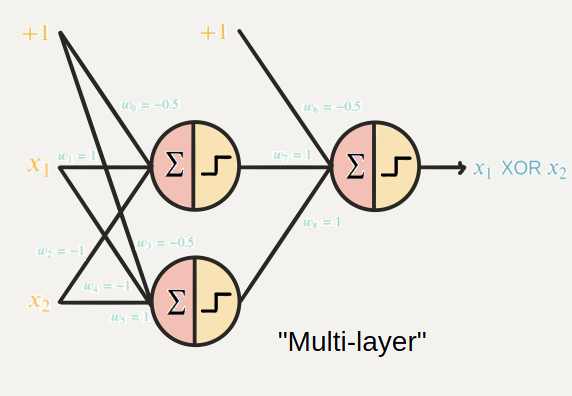

#### 이진 계단 함수의 한계 2

이처럼 층만 쌓으면 이진 계단 함수를 사용한 모델은 비선형적 데이터도 예측할 수 있다. 하지만 이진 계단 함수는 몇 가지 큰 단점이 있다.

바로 역전파 알고리즘(backpropagation algorithm)을 사용하지 못하는 것이다. 이진 계단 함수는 0에서는 미분이 안 될 뿐더러 0인 부분을 제외하고 미분을 한다고 해도 미분 값이 전부 0이 나온다. 때문에 역전파에서 가중치들이 업데이트 되지 않는다.

현실의 대부분 문제들에서 다층 인공신경망을 사용하고 있고 이런 인공신경망을 훈련시킬 때 역전파 알고리즘을 사용하고 있다. 이진 계단 함수를 사용한다면 역전파 알고리즘을 사용하지 못하기 때문에 상대적으로 비효율적인 업데이트 방법을 사용해야 한다. 즉, 현실의 복잡한 문제는 사실상 해결하기 어렵다.

또한 다중 출려근 할 수 없다는 단점이 있다. 이진 계단 함수는 출력을 1 또는 0으로 밖에 주지 못하기 때문에 다양한 클래스를 구분해야 하는 문제는 해결할 수 없다.

이진 계단 함수는 정말 초기의 퍼셉트론에서 쓰이던 것으로 이런 것이 있었구나 정도만 알고 넘어가면 좋을 듯 하다.

### 활성화 함수의 종류 (2) 선형 활성화 함수

#### 선형 활성화 함수

선형 활성화 함수(linear activation function)은 말 그대로 '선형'인 활성화 함수다.

선형 활성화 함수를 사용한 모델은 이진 계단 함수를 사용한 모델과 다르게 다중 출력이 가능하다. 때문에 이진 분류는 물론이고 간단한 다중 분류 문제까지도 해결할 수 있다.

또한 미분이 가능해서 역전파 알고리즘 또한 사용할 수 있다.

대표적인 선형 함수로는 f(x) = x가 있다. 즉, 신호를 받은 그대로 출력하는 거다.

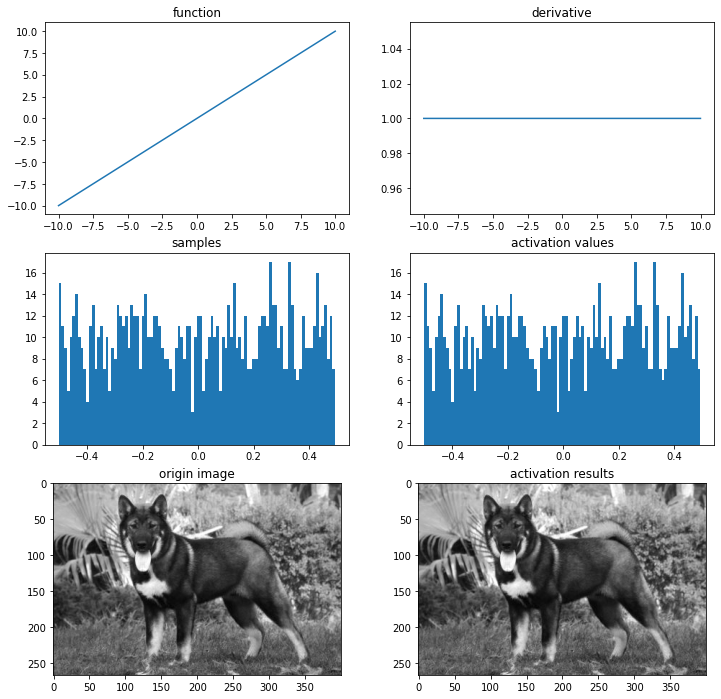

In [43]:
img_path = '/content/drive/MyDrive/jindo_dog.jpg'

# 선형 함수
def linear(x):
    return x

def dev_linear(x):
    return 1

# 시각화
ax = plot_and_visulize(img_path, linear, dev_linear)
ax.show()

선형 활성화 함수의 치역은 실수 전체다.

선형 활성화 함수를 사용한 모델은 그 이름에 걸맞게 선형적으로 구분 가능한 문제를 해결할 수 있다. 조금 전에 보았던 AND gate와 OR gate를 가져와 보겠다.

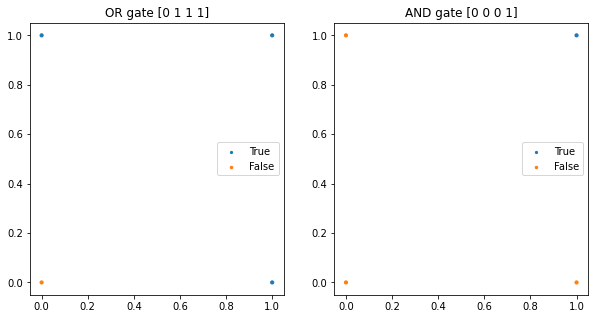

In [44]:
# AND gate, OR gate
threshold = 0
X = np.array([[0,0], [1,0], [0,1], [1,1]])

plt.figure(figsize=(10,5))
# OR gate
or_y = np.array([x1 | x2 for x1,x2 in X])
ax1 = plt.subplot(1,2,1)
ax1.set_title('OR gate ' + str(or_y))
ax1 = scatter_plot(ax1, X, or_y)

# AND gate
and_y = np.array([x1 & x2 for x1,x2 in X])
ax2 = plt.subplot(1,2,2)
ax2.set_title('AND gate ' + str(and_y))
ax2 = scatter_plot(ax2, X, and_y)

plt.show()

선형 활성화 함수를 사용한 단층 퍼셉트론을 이용해 해당 gate를 다음과 같이 구현할 수 있다.

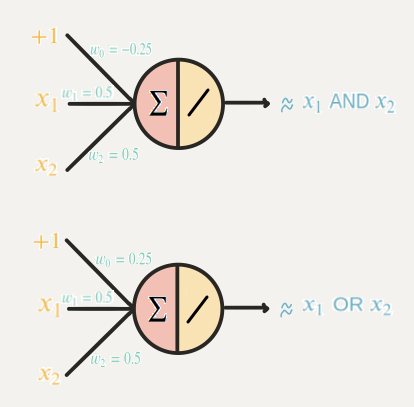

In [45]:
import tensorflow as tf

# OR gate model
or_linear_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,), dtype='float64'),
    tf.keras.layers.Dense(1, activation='linear')
])
or_linear_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
or_linear_model.summary()

# AND gate model
and_linear_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,), dtype='float64'),
    tf.keras.layers.Dense(1, activation='linear')
])
and_linear_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
and_linear_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [46]:
or_linear_model.fit(X, or_y, epochs=1000, verbose=0)
and_linear_model.fit(X, and_y, epochs=1000, verbose=0)
print('done')

done


/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


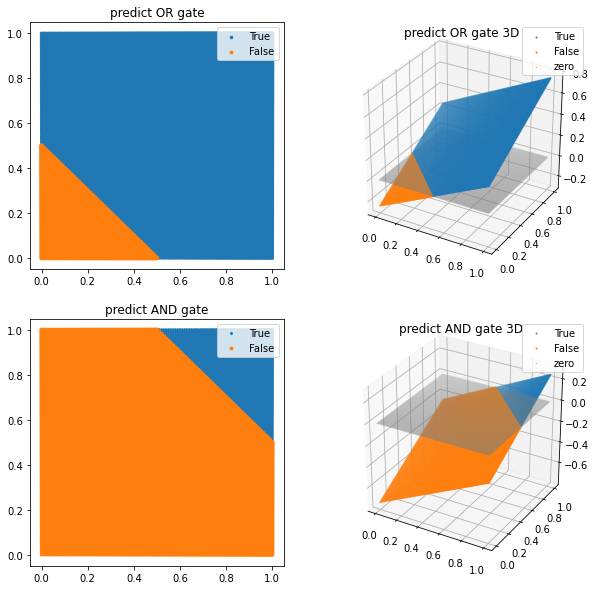

In [47]:
# 그래프로 그려보기
test_X = np.array([[x/100,y/100] for (x,y) in product(range(101),range(101))])
pred_or_y = or_linear_model(test_X)
pred_and_y = and_linear_model(test_X)

plt.figure(figsize=(10,10))
ax1 = plt.subplot(2,2,1)
ax1.set_title('predict OR gate')
ax1 = scatter_plot(ax1, test_X, pred_or_y, threshold=0.5)

ax2 = plt.subplot(2,2,2, projection='3d')
ax2.set_title('predict OR gate 3D')
ax2 = scatter_plot(ax2, test_X, pred_or_y, threshold=0.5, three_d=True)

ax3 = plt.subplot(2,2,3)
ax3.set_title('predict AND gate')
ax3 = scatter_plot(ax3, test_X, pred_and_y, threshold=0.5)

ax4 = plt.subplot(2,2,4, projection='3d')
ax4.set_title('predict AND gate 3D')
ax4 = scatter_plot(ax4, test_X, pred_and_y, threshold=0.5, three_d=True)

plt.show()

물론 선형 활성화를 사용한 단층 퍼셉트론이 정확한 값을 예측하는 것은 아니다. 위의 예시를 보면 첫 번째 AND gate를 구현하기 위한 모델에 [[0,0],[0,1],[1,0],[1,1]]을 넣으면 나오는 출력값은 [[-0.25],[0.25],[0.25],[0.75]]이며, 두 번째 OR gate를 구현하기 위한 모델에 [[0,0],[0,1],[1,0],[1,1]]를 넣으면 출력값은 [[0.25],[0.75],[0.75],[1.25]]가 된다. 따라서 그림에도 결과가 유사하다는 표현을 해놓았다. 하지만, 만약 0.50.5를 기준으로 기준보다 높으면 11이고 낮으면 0을 출력하게 한다면, 이 모델들은 AND gate와 OR gate를 완벽히 구현한다고 말할 수 있다.

그럼 이 모델로 XOR gate를 구현할 수 있을까? 정답은 '불가능하다'이다.

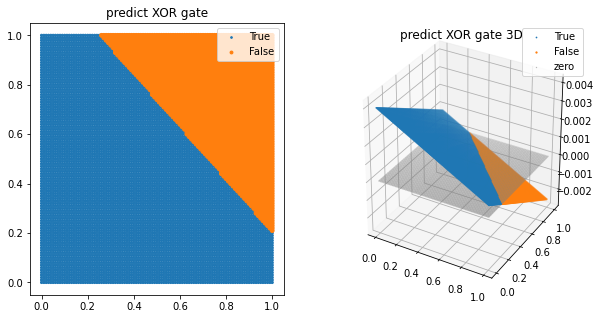

In [48]:
# XOR gate
xor_linear_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,), dtype='float64'),
    tf.keras.layers.Dense(1, activation='linear')
])
xor_linear_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
xor_linear_model.fit(X, xor_y, epochs=1000, verbose=0)

# 그래프로 그려보기
test_X = np.array([[x/100,y/100] for (x,y) in product(range(101),range(101))])
pred_xor_y = xor_linear_model(test_X)

plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,2,1)
ax1.set_title('predict XOR gate')
ax1 = scatter_plot(ax1, test_X, pred_xor_y, threshold=0.5)

ax2 = plt.subplot(1,2,2, projection='3d')
ax2.set_title('predict XOR gate 3D')
ax2 = scatter_plot(ax2, test_X, pred_xor_y, threshold=0.5, three_d=True)

plt.show()

마찬가지로 선 하나로는 나눌 수 없기 때문이다.

#### 선형 활성화 함수의 한계

선형 활성화 함수의 한계는 명확하다. 바로 모델에 선형 활성화 함수를 사용한다면 비선형적 특성을 지닌 데이터를 예측하지 못한다는 것이다.

### 활성화 함수의 종류 (3) 비선형 활성화 함수 - 시그모이드, Softmax

비선형인 활성화 함수는 앞에서 나왔던 활성화 함수들의 문제점을 해결한 함수이다. 따라서 비선형 활성화 함수를 사용한 모델은 역전파 알고리즘을 사용할 수 있으며, 다중 출력도 간ㅇ하고 비선형적 특성을 지닌 데이터도 예측할 수 있다.

#### 시그모이드 / 로지스틱

첫번째로 소개해 드릴 비선형 활성화 함수는 시그모이드(sigmoid 혹은 로지스틱 logistic) 활성화 함수이다. 시그모이드 함수는 다음과 같이 표현할 수 있다.

시그모이드 함수의 치역은 (0,1) 즉, 0 < 0(x) < 1 이다.

시그모이드 함수를 쓰는 가장 주된 이유가 바로 치역이 0과 1 사이라는 것이다. 특히 확률을 예측해야 하는 모델에서 자주 사용된다.

시그모이드 함수의 미분은 다음과 같습니다.

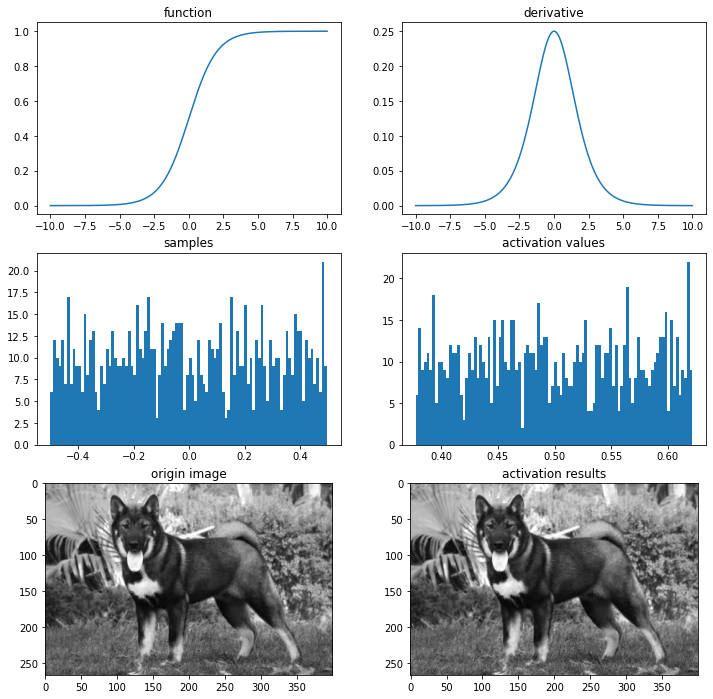

In [62]:
import os
img_path = '/content/drive/MyDrive/jindo_dog.jpg'

# 시그모이드 함수
def sigmoid(x):
    return 1/(1+np.exp(-x).astype(np.float64))

def dev_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

# 시각화
ax = plot_and_visulize(img_path, sigmoid, dev_sigmoid)
ax.show()

#### 수치 미분과 해석 미분의 차이

일반적인 프로그래밍을 통해서는 해석 미분을 구할 수 없기 때문에 꽤많은 분들이 모르는 함수의 미분을 구할 때 수치 미분(numerical differentiation)을 구한다. 어떤 함수 f(x)가 았을 때 이것의 미분 f'(x)은 다음과 같이 표현할 수 있다.

여기서 수치 미분이라고 하면 h의 값을 최데한 0에 가까운 값으로 잡아서 실제 미분값에 근사하게 만들어주는 것이라고 할 수 있다.

h의 값을 0에 가까운 아주 작은 수로 잡으면 수치 미분을 통해 계산한 값과 실제 미분을 통해 계산한 값은 차이가 없을 것으로 생각된다. 하지만 적당한 h를 주지 않는다면 생각보다 큰 차이가 있을 수 있다.

(아주 작은 hh를 주려고 h=1e-20h=1e−20이라고 선언한다면, 컴퓨터가 이를 그냥 0으로 인식해 x+h = xx+h=x라는 결과를 출력해버립니다.)

이는 직접 그래프를 그려보는 것으로 확인할 수 있다.

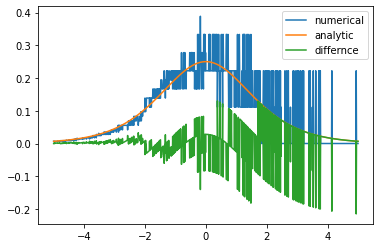

In [50]:
# 수치 미분
def num_derivative(x, function):
    h = 1e-15 # 이 값을 바꾸어 가며 그래프를 확인해 보세요
    numerator = function(x+h)-function(x)
    return numerator/h

# 두 그래프의 차이
diff_X = [-5+x/100 for x in range(1001)]
dev_y = np.array([dev_sigmoid(x) for x in diff_X])
num_dev_y = np.array([num_derivative(x, sigmoid) for x in diff_X])

diff_y = dev_y - num_dev_y
plt.plot(diff_X, num_dev_y, label='numerical')
plt.plot(diff_X, dev_y, label='analytic')
plt.plot(diff_X, diff_y, label='differnce')
plt.legend()

plt.show()

#### 시그모이드 함수의 단점

시그모이드 함수에는 두 가지 큰 단점이 있다.

시그모이드 함수는 0 또는 1에서 포화(saturate) 된다. 이 밀은 입력값이 아무리 커져도 함수의 출력은 1에 더 가까워저 갈 뿐 1이상으로 높아 않고, 입력값이 아무리 작아져도 함수의 출력은 0에 더 가까워져 갈 뿐 0 이하로 떨어지지 않는다는 의미이다. 이렇게 포화가 되면 발생하는 일이 바로 그래디언트가 0과 아주 가까워지는 것이다. 역전파에서 0과 가까워진 그래디언트는 앞에서 온 역전파 값에 곱하지게 되는데 그렇게 되면 그 이후로 전파되는 모든 역전파 값이 0에 근접하게 되어 사실상 가중치 업데이트가 일어나지 않게 된다. 이것을 '그래디언트를 죽인다'라고 표현한다. 극단적인 예로 만약 어떤 모델의 초기 가중치 값들을 아주 크게 잡아 포화상태를 만들면 역전파 때 그래디언트가 죽기 때문에 아무리 많이 에포크를 돌려도 훈련이 거의 되지 않는다.

시그모이드 함수의 출력은 0이 중심(zero-centered)이 아니다. 여기서 발생하는 문제는 훈련의 시간이 오래 걸리게 된다는 것이다. 만약 입력값으로 들어오는 데이터의 값이 모두 양수라고 가정하고 모델에 있는 어떤 노드의 출력값이 σ(∑ 
i
​
 w 
i
​
 x 
i
​
 +b)라고 하겠다. 그럼 이 노드의 가중치 업데이트를 위해 구해야 하는 그래디언트는 다음과 같다.

upstream gradient의 부호에 따라 이 노드의 가중치는 모두 양의 방향으로 업데이트되거나, 모두 음의 방향으로 업데이트가 된다. 이런 식으로 업데이트가 이루어지면 최적값을 향해 직선적으로 업데이트되는 것보다 훨씬 시간이 오래 걸리게 된다.

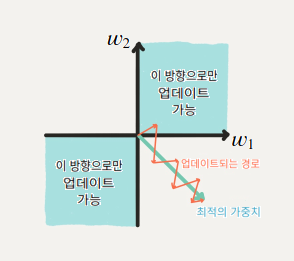

이러한 단점들 때문에 최근에는 자주 사용하지 않게 되었다.

#### 비선형 활성화 함수를 사용해 AND gate, XOR gate 구현

비선형 활성화 함수인 시그모이드 함수를 이용해 AND gate, OR gate, XOR gate를 구현해 보겠다.

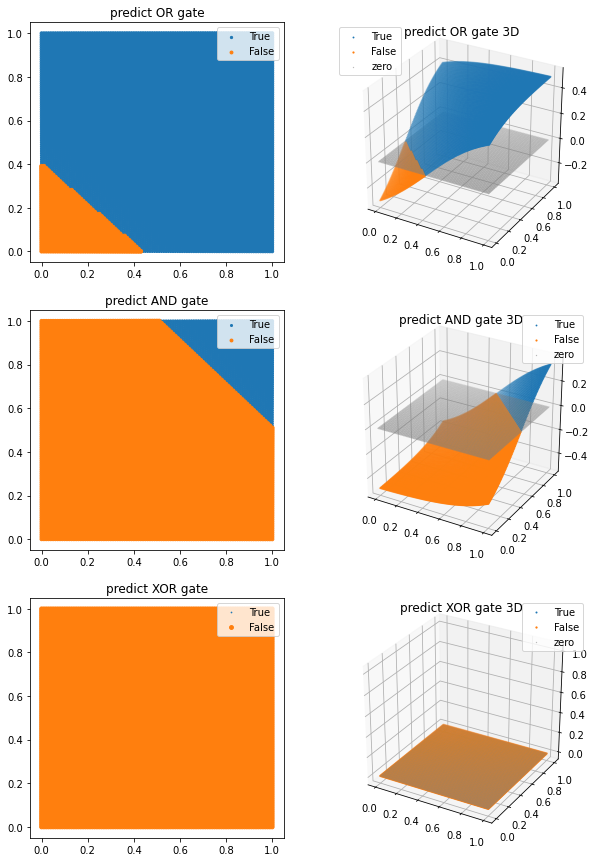

In [58]:
# OR gate
or_sigmoid_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
or_sigmoid_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
or_sigmoid_model.fit(X, or_y, epochs=1000, verbose=0)

# AND gate
and_sigmoid_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
and_sigmoid_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
and_sigmoid_model.fit(X, and_y, epochs=1000, verbose=0)

# XOR gate
xor_sigmoid_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
xor_sigmoid_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
xor_sigmoid_model.fit(X, xor_y, epochs=1000, verbose=0)

# 그래프로 그려보기
test_X = np.array([[x/100,y/100] for (x,y) in product(range(101),range(101))])
pred_or_y = or_sigmoid_model(test_X)
pred_and_y = and_sigmoid_model(test_X)
pred_xor_y = xor_sigmoid_model(test_X)

plt.figure(figsize=(10,15))
ax1 = plt.subplot(3,2,1)
ax1.set_title('predict OR gate')
ax1 = scatter_plot(ax1, test_X, pred_or_y, threshold=0.5)

ax2 = plt.subplot(3,2,2, projection='3d')
ax2.set_title('predict OR gate 3D')
ax2 = scatter_plot(ax2, test_X, pred_or_y, threshold=0.5, three_d=True)

ax3 = plt.subplot(3,2,3)
ax3.set_title('predict AND gate')
ax3 = scatter_plot(ax3, test_X, pred_and_y, threshold=0.5)

ax4 = plt.subplot(3,2,4, projection='3d')
ax4.set_title('predict AND gate 3D')
ax4 = scatter_plot(ax4, test_X, pred_and_y, threshold=0.5, three_d=True)

ax5 = plt.subplot(3,2,5)
ax5.set_title('predict XOR gate')
ax5 = scatter_plot(ax5, test_X, pred_xor_y, threshold=0.5)

ax6 = plt.subplot(3,2,6, projection='3d')
ax6.set_title('predict XOR gate 3D')
ax6 = scatter_plot(ax6, test_X, pred_xor_y, threshold=0.5, three_d=True)

plt.show()

XOR gate는 제대로 구현하지 못할 것을 확인할 수 있다. 하지만 이것이 비선형 함수들도 XOR gate를 구현하지 못한다는 것은 아니다. 다만, 좀 더 특수한 비선형 함수가 필요하다.

참고 자료에 나와 있듯이 2차 다항식을 추가한 시그모이드 함수를 사용한다면 XOR gate를 구현할 수 있다.

이 밖에도 layer를 추가해 준다면 XOR gate를 무리 없디 구현하는 것을 확인할 수 있다.

(하지만 선형 함수를 사용했을 때는 어떻게 해도 아 되죠.)



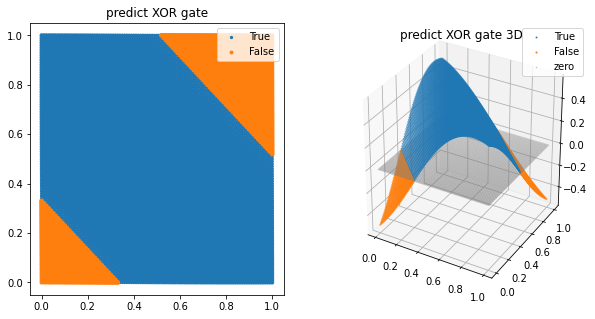

In [59]:
# 레이어를 추가했을 때
# XOR gate
xor_sigmoid_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(2, activation='sigmoid'), # 2 nodes로 변경
    tf.keras.layers.Dense(1)
])
xor_sigmoid_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
xor_sigmoid_model.fit(X, xor_y, epochs=1000, verbose=0)

plt.figure(figsize=(10,5))
pred_xor_y = xor_sigmoid_model(test_X)

ax1 = plt.subplot(1,2,1)
ax1.set_title('predict XOR gate')
ax1 = scatter_plot(ax1, test_X, pred_xor_y, threshold=0.5)

ax2 = plt.subplot(1,2,2, projection='3d')
ax2.set_title('predict XOR gate 3D')
ax2 = scatter_plot(ax2, test_X, pred_xor_y, threshold=0.5, three_d=True)

plt.show()

#### Softmax는 뭔가요?

Softmax는 여러분들이 강아지와 고양이 사진을 구분하는 분류 문제에서 가장 많이 접한 함수이죠 ? 시그모이드는 Binary Classification, 즉 참(1) or 거짓(0) 등 2가지 class를 분류할 때 많이 쓴다. 왜냐하면 시그모이드는 0과 1 사이의 출력값을 가지고 있기 때문이다.

한편, Softmax는 10가지, 100가지 class 등 class의 수에 제한 없이 "각 class의 확률"을 구할 때 쓰인다. 예컨대, 가위, 바위, 보 사진 분류 문제는 3개 class 분류 문제이고, softmax는 각 class의 확률값, 즉(0.2, 0.5, 0.3) 이렇게 출력값을 줍니다. Softmax의 가장 큰 특징은 확률의 성질인 모든 경우의 수 (=모든 class)의 확률을 더하면 1이 되는 성질을 가지고 있다. 그래서 softmax는 모델의 마지막 layer에서 활용이 된다.

### 활성화 함수의 종류 (4) 비선형 활성화 함수 - 하이퍼볼릭 탄젠트

#### 하이퍼볼릭 탄젠트

하이퍼볼릭 탄젠트(tanh, Hyperbolic tangent) 함수는 쌍곡선 함수 중 하나이다.

하이퍼볼릭 탄젠트 함수의 치역은 (-1, 1), 즉, −1<σ(x)<1 입니다. 그래프를 보면 알 수 있듯이 시그모이드 함수가 0이 중심이 아니었던 것과 다르게 하이퍼볼릭 탄젠트 함수는 0을 중심으로 하고 있다. 따라서 일반적으로 하이퍼볼릭 탄젠트 함수를 사용한 모델이 시그모이드 함수를 사용한 모델보다 더 빨리 훈련된다.

이 하이퍼볼릭 탄젠트 함수는 시그모이드 함수를 이용해서도 표현할 수 있습니다.

하이퍼볼릭 탄젠트 함수의 미분은 다음과 같다.

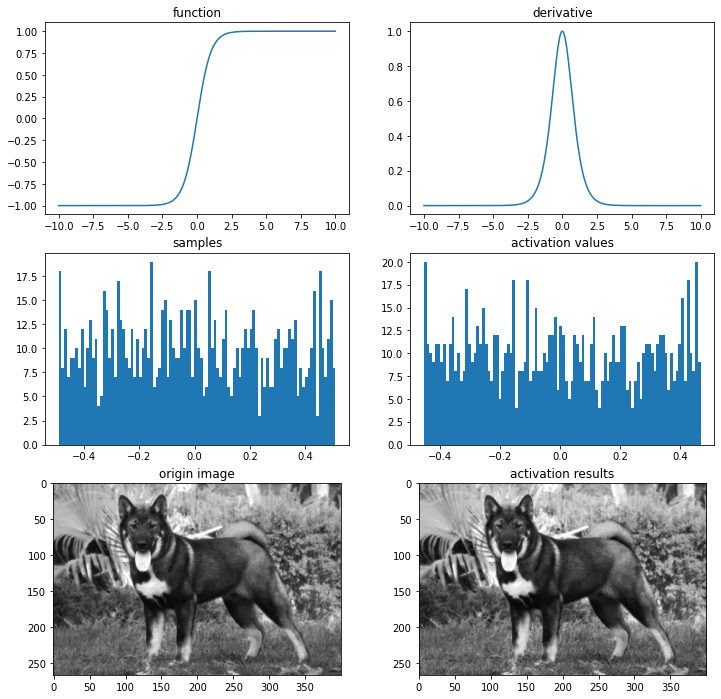

In [53]:
# 하이퍼볼릭 탄젠트 함수
def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

def dev_tanh(x):
    return 1-tanh(x)**2

# 시각화
ax = plot_and_visulize(img_path, tanh, dev_tanh)
ax.show()

#### 하이퍼볼릭 탄젠트 함수의 단점



하이퍼볼릭 탄젠트 함수는 그래프에서 알 수 있듯 -1 또는 1에서 포화됩니다.

### 활성화 함수의 종류 (5) 비선형 활성화 함수 -ReLU

#### ReLU

ReLU(rectified linear unit) 한수는 최근 가장 많이 사용되고 있는 활성화 함수입니다. ReLU의 식은 다음과 같다. 

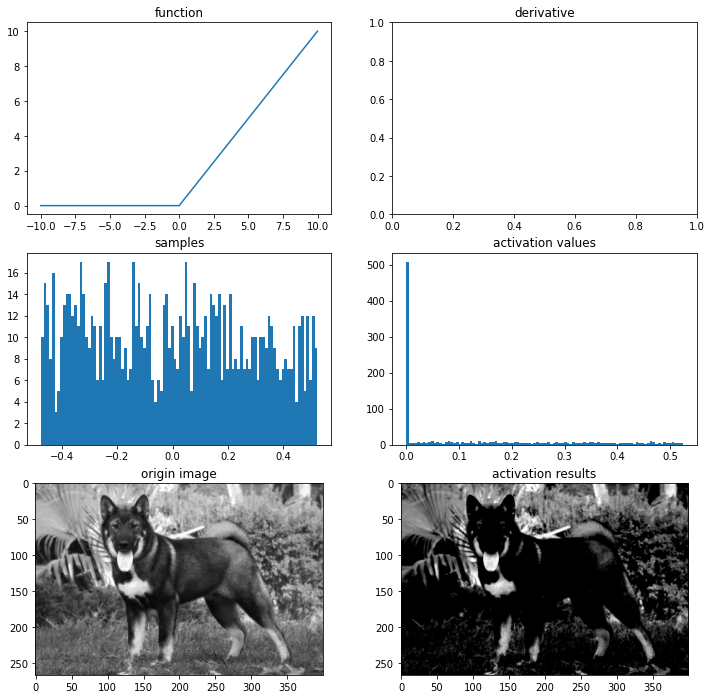

In [54]:
# relu 함수
def relu(x):
    return max(0,x)

# 시각화
ax = plot_and_visulize(img_path, relu)
ax.show()

ReLU함수의 치역은 [0,∞)입니다. ReLU를 사용한 모델은 하이퍼볼릭 탄젠트를 사용한 모델보다 몇 배 더 빠르게 훈련이 됩니다. 이는 아래의 그래프를 통해서 확인할 수 있다. 

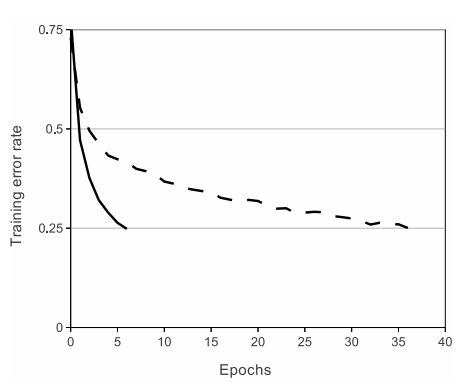

위 그래프는 에포크당 훈련 에러 비율을 나타내고 있다. 실선이 ReLU 함수를 사용한 모델의 에러 비율이고, 점선이 하이퍼볼릭 탄젠트 함수를 사용한 모델의 에러 비율이다. ReLU를 사용한 모델이 약 7배 정도 빠르게 에러 비율이 감소한 것을 볼 수 있다. 또한 ReLU 함수는 시그모이드나 하이퍼볼릭 탄젠트처럼 비율이 높은 (예를 들면, exponential와 같은)연산을 사용하지 않기 때문에 처리 속도가 빠르다. 

ReLU는 0을 제외한 구간에서 미분이 가능하다. 이는 다음과 같이 표현할 수 있다.

f'(x) = 0 if x < 0

f'(x) = 1 if x > 0

undefined at x = 0

왜 x = 0에서는 미분이 안 된다고 하는 걸까?

이때, 어떤 값 x = a에 대해 함수 f의 미분이 존재한다는 것은 그 값에 대한 함수의 우미분과 좌미분값이 같다는 것이다.

따라서, 만약 어떤 값에 대해 함수의 좌미분 값과 우미분 값이 다르다면, 그 함수는 그 값에 대해 미분이 불가능하다고 표현할 수 있다.

ReLU 함수의 우미분과 좌미분이 다르다. 그래서 0에 대해서 미분을 할 수 있다. 

그렇다면, 값으로 0이 주어졌을 때, ReLU 함수의 그래디언트는 어떻게 구하는가 ? 

이러한 상황에선 일반적으로 무작위하게 0 또는 1을 출력한다.



#### ReLU 함수를 이용한 모델은 비선형적 데이터의 특징을 잘 잡아낼까?

ReLU 함수를 보고 있으면 이러한 의문이 든다.

'시그모이드 함수처럼 곡선이 포함되어 있지 않은데 어떻게 비선형적 데이터의 특징을 잡아낼까?'

과연 ReLU함수로 f(x) = x**2와 같은 함수를 표현할 수 있을까? 정답은 '표현'할 수 있다'이다. 간단한 실험을 통해 알아보자.

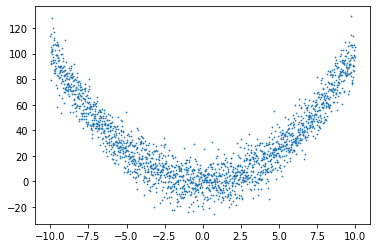

In [55]:
q_X = np.array([-10+x/100 for x in range(2001)])
q_y = np.array([(x)**2 + np.random.randn(1)*10 for x in q_X])
plt.scatter(q_X, q_y, s=0.5)

In [56]:
approx_relu_model_p = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(6, activation='relu'), # 6 nodes 병렬 연결
    tf.keras.layers.Dense(1)
])
approx_relu_model_p.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), metrics=['accuracy'])
approx_relu_model_p.fit(q_X, q_y, batch_size=32, epochs=100, verbose=0)

approx_relu_model_s = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(2, activation='relu'),# 2 nodes 직렬로 3번 연결
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1)
])
approx_relu_model_s.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), metrics=['accuracy'])
approx_relu_model_s.fit(q_X, q_y, batch_size=32, epochs=100, verbose=0)

approx_relu_model_p.summary()
approx_relu_model_s.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 6)                 12        
                                                                 
 dense_29 (Dense)            (None, 1)                 7         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 2)                 4         
                                                                 
 dense_31 (Dense)            (None, 2)                 6         
                                                                 
 dense_32 (Dense)            (None

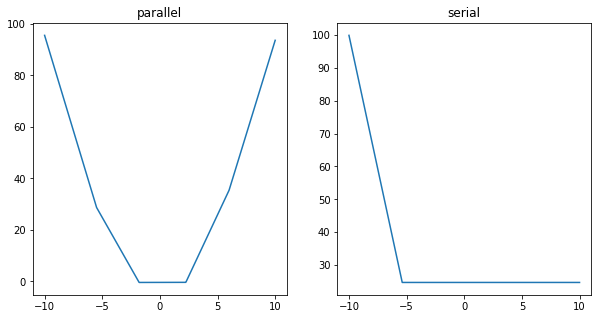

In [57]:
q_test_X = q_X.reshape((*q_X.shape,1))
plt.figure(figsize=(10,5))

ax1 = plt.subplot(1,2,1)
ax1.set_title('parallel')
pred_y_p = approx_relu_model_p(q_test_X)
ax1.plot(q_X, pred_y_p)

ax2 = plt.subplot(1,2,2)
ax2.set_title('serial')
pred_y_s = approx_relu_model_s(q_test_X)
ax2.plot(q_X, pred_y_s)

plt.show()

실제로 x2의 그래프를 근사할 수 있는지 확인해 봄과 동시에 노드를 병렬로 쌓는 것과 직렬로 쌓는 것 중에 어느 것이 더 좋은지도 비교해 보았습니다. 이 결과로 우리는 ReLU함수를 사용해도 충분히 x2과 같이 비선형적 데이터를 예측해낼 수 있다는 것을 알 수 있었고, 파라미터 수가 같음에도 불구하고 노드를 병렬로 쌓은 것이 직렬로 쌓은 것보다 더 좋은 결과를 낸 것을 확인할 수 있다.

#### ReLU 함수의 단점

ReLU 함수의 출력값이 0이 중심이 아니다. 따라서 위에서 언급했던 문제가 발생할 수 있다. 또 하나의 단점은 Dying ReLU 입니다. 이것의 의미는 모델에서 ReLU를 사용한 노드가 비활성화되며 출력을 0으로만 하게 되는 것이다. 왜 이런 상황이 발생하는 지 알아보겠다. 어떤 모델에 있는 한 노드의 출력값이  max(o, \sum_i w_i x_i + b)라고 하겠습니다. 그럼 이 노드는 가중치 업데이트를 위해 구해야 하는 그래디언트는 다음과 같다.


만약, 이전 훈련 스텝에서 이 노드의 가중치 업데이트되어 ∑ 
i
​
 w 
i
​
 x 
i
​
 +b가 가중치 w값에 의해 입력값 x에 상관없이 0이하로 나오게 되었다면, 이 이후의 업데이트에서는 그래디언트가 항상 0이 되어 가중치 업데이트가 일어나지 않게 되었다. 즉, 이노드의 출력값과 그래디언트가 0이 되어 노드가 죽어 버립니다. 이러한 문제는 특히 학습률(learning rate)을 크게 잡을 때 자주 발생한다. 반대로 학습률을 줄여준다면 이 문제는 적게 발생한다.

### 활성화 함수의 종류 (6) 비선형 활성화 함수 - ReLU의 단점을 극복하기 위한 시도들

#### Leaky ReLU

Leaky ReLU 함수는 ReLU 함수의 'Dying ReLU'을 해결하기 위한 시도 중 하나이다. 식을 먼저 보겠다.

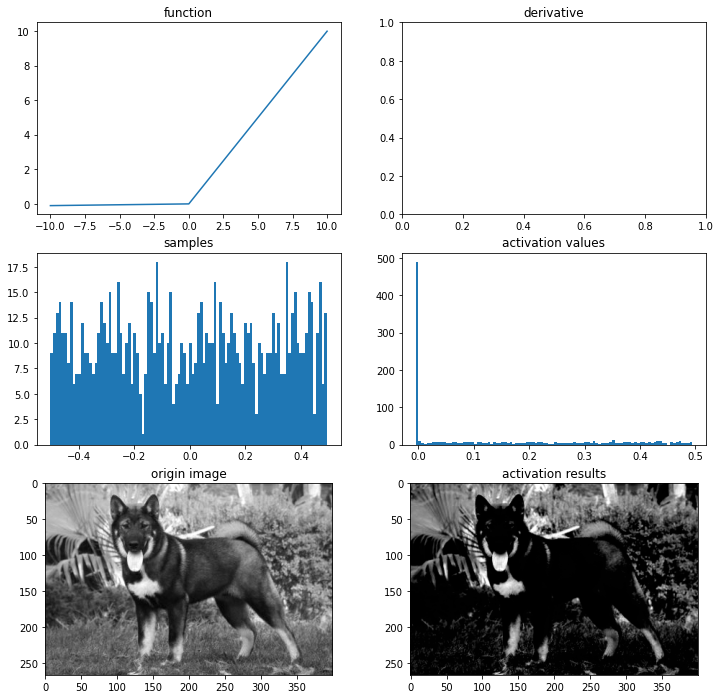

In [63]:
# leaky relu 함수
def leaky_relu(x):
    return max(0.01*x,x)

# 시각화
ax = plot_and_visulize(img_path, leaky_relu)
ax.show()

'Dying ReLU'를 발생시켰던 0을 출력하던 부분을 아주 작은 음수값을 출력하게 만들어 주어 해당 문제를 해결하였다.

이 부분을 제외하고는 ReLU와 같은 특성을 가진다.

#### PReLU

PReLU(parametric ReLU)는 Leaky ReLU와 유사하지만 새로운 파라미터를 추가하여 0 미만일 때의 '기울기'가 훈련되게 했습니다. 식으로 표현하면 다음과 같다.

여기서 a가 훈련과정에서 업데이트된다.

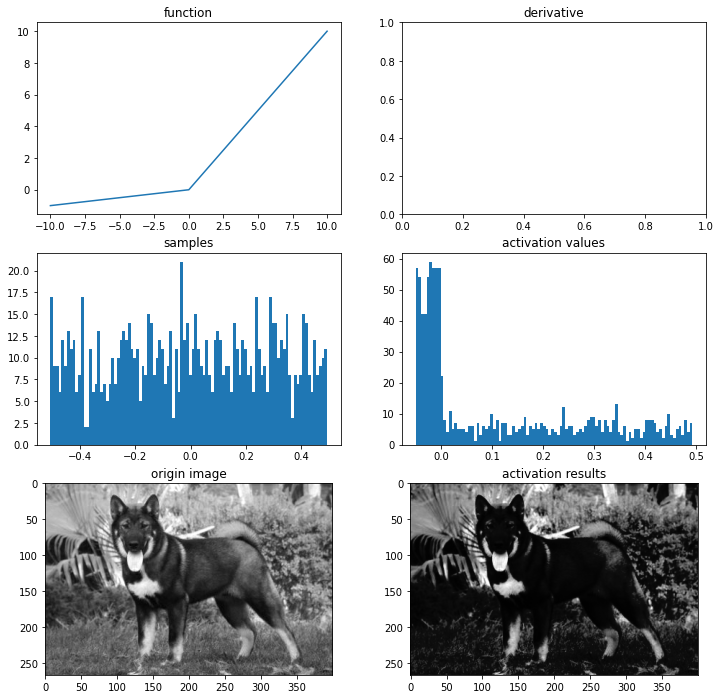

In [64]:
# PReLU 함수
def prelu(x, alpha):
    return max(alpha*x,x)

# 시각화
ax = plot_and_visulize(img_path, lambda x: prelu(x, 0.1)) # parameter alpha=0.1일 때

ax.show()

#### ELU

ELU(exponential linear unit)은 ReLU의 모든 장점을 포함하며, 0이 중심점이 아니었던 단점과, 'Dying ReLU'문제를 해결한 활성화 함수이다. 식은 다음과 같다.

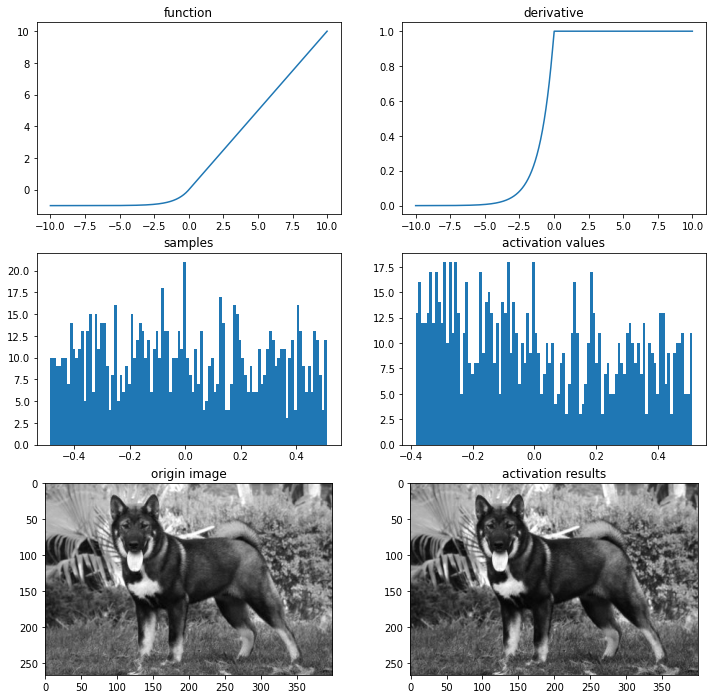

In [65]:
# elu 함수
def elu(x, alpha):
    return x if x > 0 else alpha*(np.exp(x)-1)

def dev_elu(x, alpha):
    return 1 if x > 0 else elu(x, alpha) + alpha

# 시각화
ax = plot_and_visulize(img_path, lambda x: elu(x, 1), lambda x: dev_elu(x, 1)) # alpha가 1일 때
ax.show()

이 함수의 단점은 exponential 연산이 들어가서 계산 비용이 높아졌다는 점이 있다.